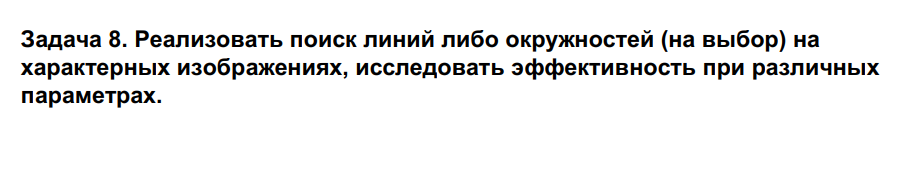

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


def hough(img, dp, mD, p1, p2, minR, maxR):
    
    img_copy = img.copy()
    img_blur = cv.medianBlur(cv.cvtColor(img_copy, cv.COLOR_BGR2GRAY), 5)    
    circles = cv.HoughCircles(img_blur, cv.HOUGH_GRADIENT, dp=dp,
                              minDist=int(mD), param1=p1, param2=p2, minRadius=int(minR), maxRadius=int(maxR))
    circles = np.uint16(np.around(circles))
    
    
    for (x,y,r) in circles[0,:]:
        # draw the outer circle
        cv.circle(img_copy, (x, y), r, (0,255,0), 2)
        # draw the center of the circle
        cv.circle(img_copy, (x, y), 2, (255,0,0), 2)
        
    plt.figure(figsize=(12, 8))
    plt.imshow(img_copy), plt.xticks([]), plt.yticks([])
    plt.show()

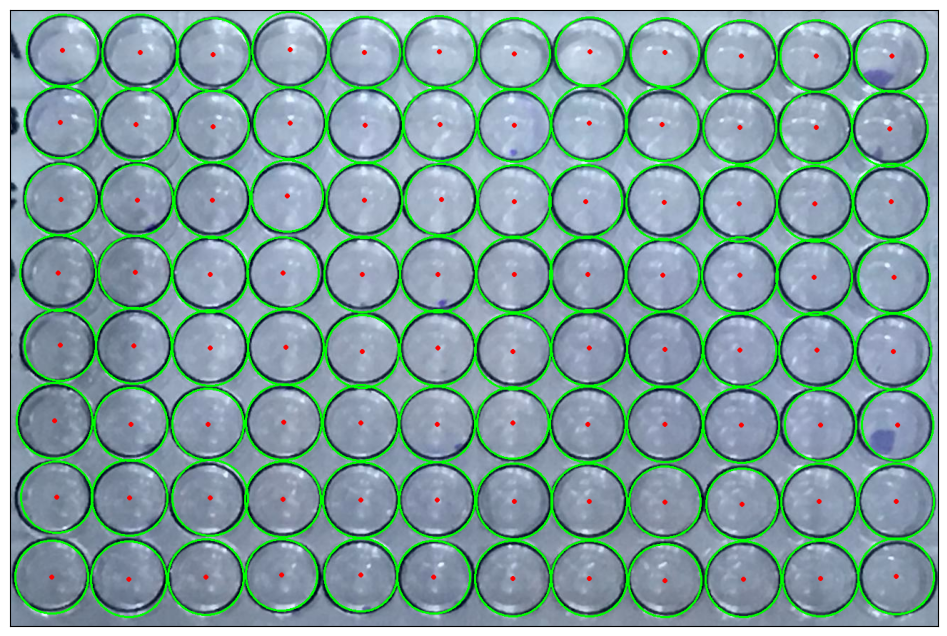

In [2]:
img = cv.imread('circles.jpg')
assert img is not None, "file could not be read"

h, w, _ = img.shape[:]
hough(img, dp=1.5, mD=w/13, p1=50, p2=40, minR=w/27, maxR=w/24)